# Assignment 2 by: Hur HyeonBin (S3740878)


In [29]:
# Replace "YourFullName" with your full name; replace "YourStudentID" with your student ID (e.g. s1234567)

# Task 1: Data Preparation and Analysis


## Task 1.1


In [30]:
# Start from here to write your code for Task 1. Please also feel free to add more cells in this ipynb file.
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

In [69]:
data = pd.read_csv('A2data.csv', sep = ';')

num_rows = data.shape[0]

print(f"Number of columns: {num_rows}")

data['free sulfur dioxide'] = pd.to_numeric(data['free sulfur dioxide'], errors='coerce')
data['residual sugar'] = pd.to_numeric(data['residual sugar'], errors='coerce')
data['density'] = pd.to_numeric(data['density'], errors='coerce')
data['total sulfur dioxide'] = pd.to_numeric(data['total sulfur dioxide'], errors='coerce')

num_rows = data.shape[0]
print(f"Number of columns: {num_rows}")

column_means = data.mean()

data.fillna(column_means, inplace=True)

missing_values = data.isnull()
missing_values_sum = missing_values.sum()
print(missing_values_sum)

random_indices = random.sample(range(num_rows), 600)
random_sample = data.iloc[random_indices]
random_sample = random_sample.dropna()
print(random_sample.shape[0])
random_sample.to_csv('A2RandomSample.csv', index=False)
random_sample
print(random_sample['density'].dtype)
print(random_sample['residual sugar'].dtype)

Number of columns: 4781
Number of columns: 4781
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
600
float64
float64


## Task 1.2


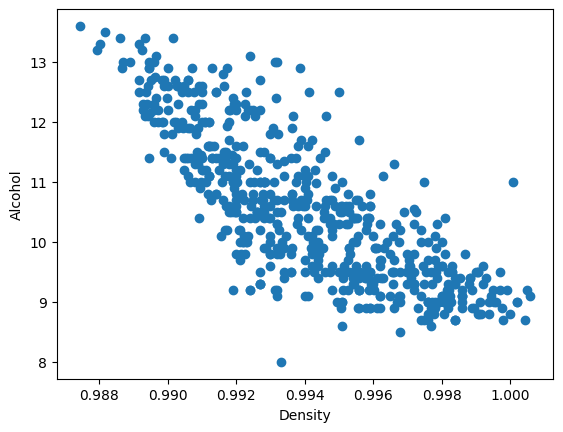

In [165]:
#Task 1.2.1
random_sample =  pd.read_csv('A2RandomSample.csv')
density = random_sample['density']
alcohol = random_sample['alcohol']

plt.scatter(density, alcohol, label='Data Points')

plt.xlabel('Density')
plt.ylabel('Alcohol')

plt.show()

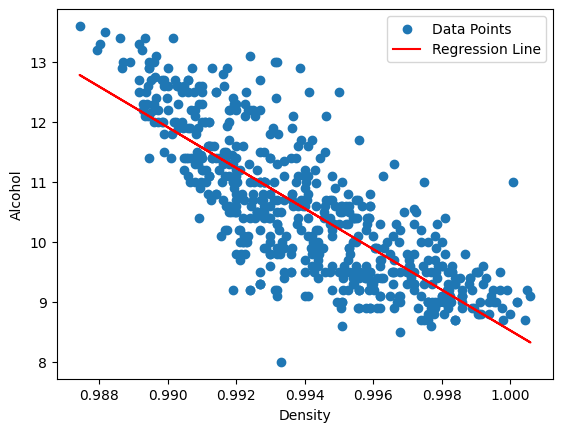

In [166]:
#Task 1.2.2

density = random_sample['density']
alcohol = random_sample['alcohol']

coefficients = np.polyfit(density, alcohol, 1)
slope, intercept = coefficients

plt.scatter(density, alcohol, label='Data Points')

regression_line = slope * density + intercept
plt.plot(density, regression_line, color='red', label='Regression Line')

plt.xlabel('Density')
plt.ylabel('Alcohol')

plt.legend()

plt.show()

In [167]:
slope, intercept = np.polyfit(density, alcohol, 1)

print(f"Linear equation: y = {slope:.2f}x + {intercept:.2f}")

Linear equation: y = -338.29x + 346.81


## Task 1.3


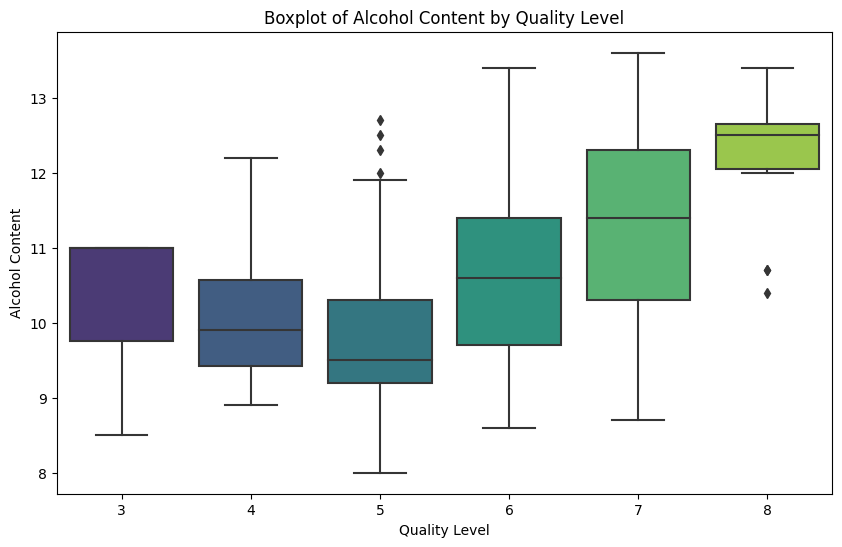

In [168]:
#Task 1.3
quality = random_sample['quality']  # Assuming 'quality' is the column name for quality levels
alcohol = random_sample['alcohol']

# Create a side-by-side boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x=quality, y=alcohol, palette='viridis')

# Label the axes and add a title
plt.xlabel('Quality Level')
plt.ylabel('Alcohol Content')
plt.title('Boxplot of Alcohol Content by Quality Level')

# Show the plot
plt.show()

# Task 2: Classification

## Task 2.1

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import graphviz

In [188]:
Copy_Data = pd.read_csv("A2RandomSample.csv")
columns = Copy_Data.columns.values
inputIndex = [0,1, 2, 3, 4, 5, 6,7,8,9,10]
targetIndex = 11
labels = Copy_Data['quality']
input = Copy_Data.drop(columns=['quality'])
target = Copy_Data['quality']
X_train, X_test, Y_train, Y_test = train_test_split(input, target,train_size = 0.7, random_state = 14)

Test Accuracy : 0.45555555555555555


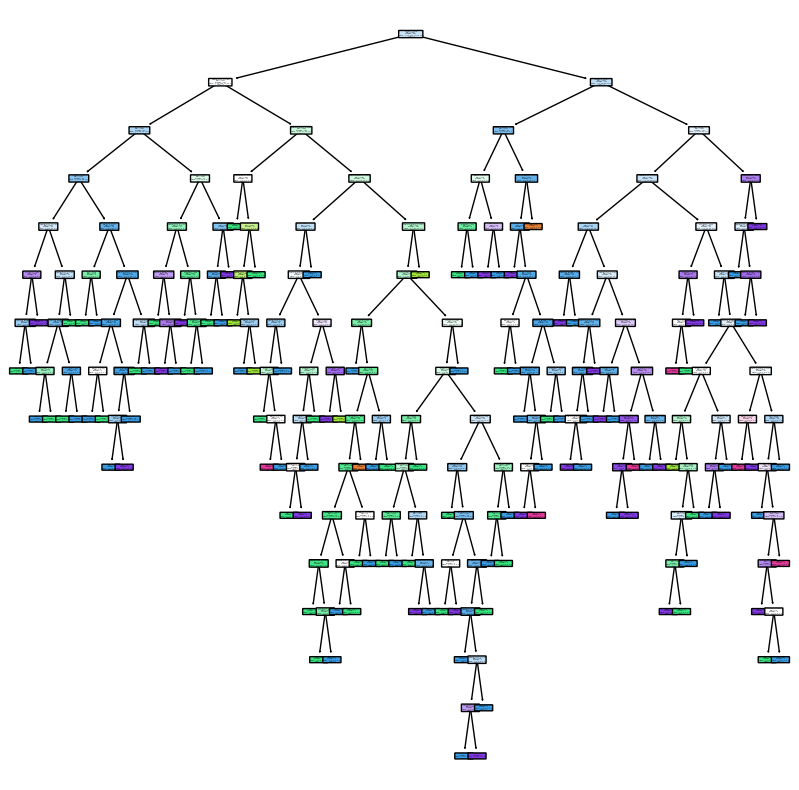

In [189]:
clf = DecisionTreeClassifier()

fit = clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(f"Test Accuracy : {accuracy}")
first_model_train_acc = clf.score(X_train, Y_train)
first_model_test_acc = clf.score(X_test, Y_test)
clf.score(X_train, Y_train)
clf.score(X_test, Y_test)

# Plot the tree
fig = plt.figure(figsize=(10,10))
fig = plot_tree(clf,
              feature_names=input.columns.values,
              class_names=list(map(str, target.unique())),
              rounded=True,
              filled=True)
plt.show()

In [191]:
from sklearn.metrics import classification_report
Y_pre = fit.predict(X_test)
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.25      0.17      0.20         6
           5       0.43      0.39      0.41        49
           6       0.60      0.60      0.60        93
           7       0.16      0.18      0.17        28
           8       0.17      0.25      0.20         4

    accuracy                           0.46       180
   macro avg       0.27      0.26      0.26       180
weighted avg       0.47      0.46      0.46       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Task 2.2

best clf has been changed with max depth :  {1}
best clf has been changed with max depth :  {2}


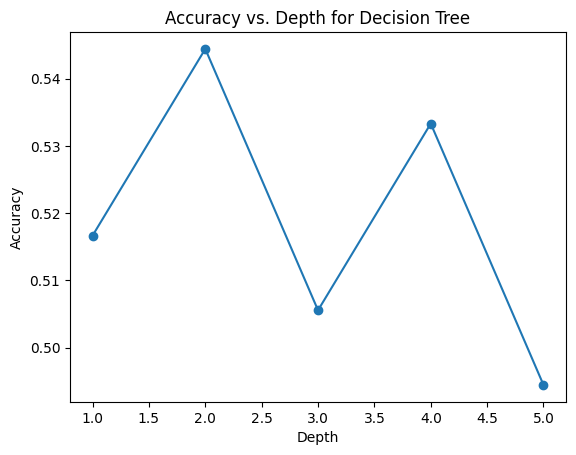

when test accuracy is the best, train accuracy: 0.5357 (depth 2)
when test accuracy is the best, test accuracy: 0.5444 (depth 2)
The depth for the final model is  2


In [192]:
# Task 2.2
best_clf = clf
depths = range(1, 6)
best_depth_count = 0
accuracies = []
train_accuracy_depth =[]
test_accuracy_depth =[]

for depth in depths:

    clf = DecisionTreeClassifier(max_depth=depth)

    clf.fit(X_train, Y_train)

    accuracy = clf.score(X_test, Y_test)
    if accuracy > best_clf.score(X_test, Y_test):
      best_clf = clf
      print("best clf has been changed with max depth : ",{depth})
      best_depth_count = best_depth_count+1

    accuracies.append(accuracy)
    train_accuracy_depth.append(clf.score(X_train, Y_train))
    test_accuracy_depth.append(clf.score(X_test, Y_test))

plt.plot(depths, accuracies, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Depth for Decision Tree')
plt.show()

max_accuracy = max(accuracies)
best_depth = depths[accuracies.index(max_accuracy)]
print(f"when test accuracy is the best, train accuracy: {train_accuracy_depth[best_depth-1]:.4f} (depth {best_depth})")
print(f"when test accuracy is the best, test accuracy: {test_accuracy_depth[best_depth-1]:.4f} (depth {best_depth})")

if best_depth_count > 0:
  print("The depth for the final model is ", best_depth)

if best_depth_count == 0:
  best_depth = 6
  print("Since there is no development in accuracy, depth for the final model is ",best_depth)

<function matplotlib.pyplot.show(close=None, block=None)>

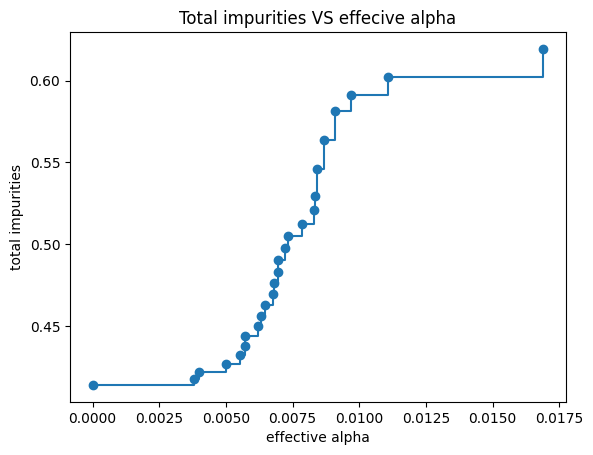

In [193]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1],marker="o", drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurities")
ax.set_title("Total impurities VS effecive alpha")
plt.show

In [194]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(max_depth = best_depth,ccp_alpha = ccp_alpha)
  clf.fit(X_train, Y_train)
  clfs.append(clf)
  if clf.score(X_train, Y_train)>=best_clf.score(X_test, Y_test):
     best_clf = clf

<function matplotlib.pyplot.show(close=None, block=None)>

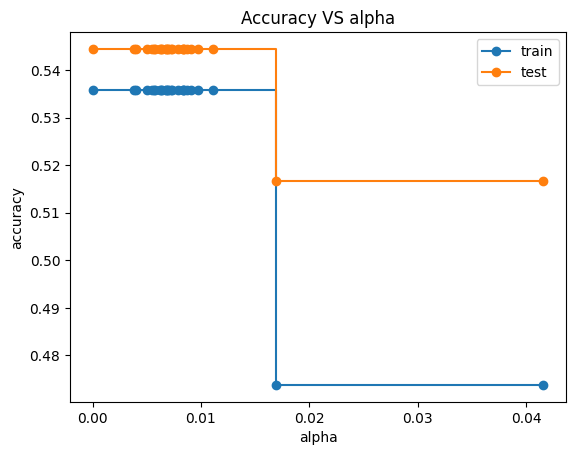

In [195]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy VS alpha")
ax.plot(ccp_alphas, train_scores, marker="o", label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker="o" , label = "test", drawstyle= "steps-post")
ax.legend()
plt.show

In [196]:
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best ccp_alpha: {best_alpha}")
best_clf_alpha = clfs[np.argmax(test_scores)]
best_train_accuracy = train_scores[np.argmax(test_scores)]
best_test_accuracy = test_scores[np.argmax(test_scores)]
print(f"Train Accuracy with Best ccp_alpha: {best_train_accuracy}")
print(f"Test Accuracy with Best ccp_alpha: {best_test_accuracy}")

Best ccp_alpha: 0.0
Train Accuracy with Best ccp_alpha: 0.5357142857142857
Test Accuracy with Best ccp_alpha: 0.5444444444444444


best clf has been changed with max feature :  {5}
acr is  :  {0.5444444444444444}
best clf has been changed with max feature :  {6}
acr is  :  {0.5444444444444444}
best clf has been changed with max feature :  {9}
acr is  :  {0.5444444444444444}
when test accuracy is the best, train accuracy: 0.5357 (feature 5)
when test accuracy is the best, test accuracy: 0.5444 (feature 5)
The max feature value  for the final model is  5


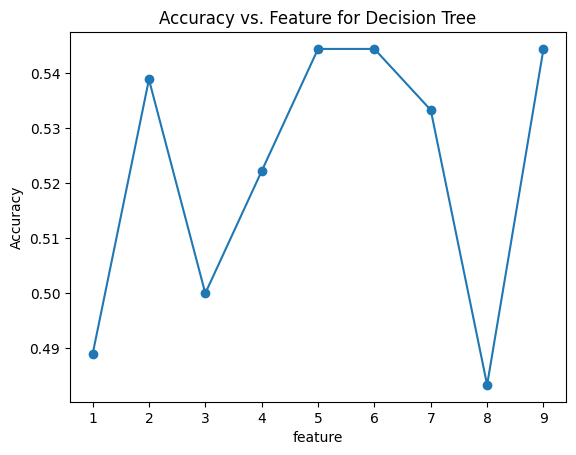

In [197]:
features = range(1, 10)
best_feature_count = 0
accuracies1 = []
train_accuracy_feature =[]
test_accuracy_feature =[]

for feature in features:

    clf = DecisionTreeClassifier(max_depth=best_depth,ccp_alpha = best_alpha,
                                    max_features=feature)
    clf.fit(X_train, Y_train)
    accuracy = clf.score(X_test, Y_test)
    if accuracy >= best_clf.score(X_test, Y_test):
      best_clf = clf
      print("best clf has been changed with max feature : ",{feature})
      print("acr is  : ",{accuracy})
      best_feature_count = best_feature_count+1

    train_accuracy_feature.append(clf.score(X_train, Y_train))
    test_accuracy_feature.append(clf.score(X_test, Y_test))

    accuracies1.append(accuracy)

plt.plot(features, accuracies1, marker='o')
plt.xlabel('feature')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Feature for Decision Tree')

max_accuracy = max(accuracies1)
best_features = features[accuracies1.index(max_accuracy)]
print(f"when test accuracy is the best, train accuracy: {train_accuracy_feature[best_features-1]:.4f} (feature {best_features})")
print(f"when test accuracy is the best, test accuracy: {test_accuracy_feature[best_features-1]:.4f} (feature {best_features})")

if best_feature_count>0:
  print("The max feature value  for the final model is ", best_features)

if best_feature_count == 0:
  best_features = None
  print("Since there is no development in accuracy, max feature for the final model is ",best_features)

best clf has been changed with max node :  4
acr is  :  0.5444444444444444
best clf has been changed with max node :  5
acr is  :  0.5444444444444444
best clf has been changed with max node :  9
acr is  :  0.5444444444444444
best clf has been changed with max node :  12
acr is  :  0.5444444444444444


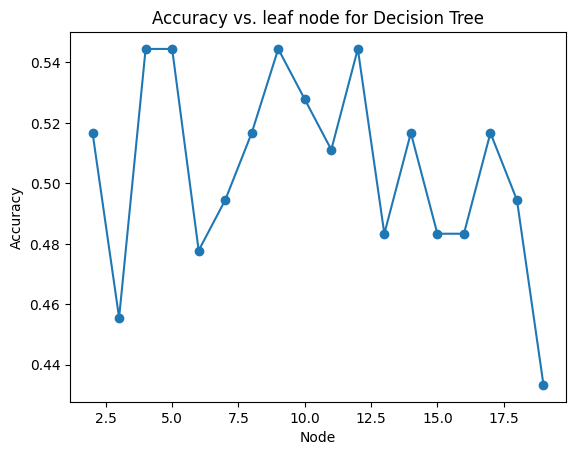

when test accuracy is the best, train accuracy: 0.5357 (feature: 4)
when test accuracy is the best, test accuracy: 0.5444 (feature: 4)
The max node value  for the final model is  4


In [198]:
nodes = range(2, 20)
best_node_count = 0
accuracies2 = []

train_accuracy_node =[]
test_accuracy_node =[]
for node in nodes:

    clf = DecisionTreeClassifier(max_depth=best_depth,max_features=best_features,ccp_alpha = best_alpha,max_leaf_nodes=node)

    clf.fit(X_train, Y_train)
    accuracy = clf.score(X_test, Y_test)
    if accuracy >= best_clf.score(X_test, Y_test):
      best_clf = clf
      print("best clf has been changed with max node : ", node)
      print("acr is  : " , accuracy)
      best_node_count = best_node_count +1

    accuracies2.append(accuracy)
    train_accuracy_node.append(clf.score(X_train, Y_train))
    test_accuracy_node.append(clf.score(X_test, Y_test))

plt.plot(nodes, accuracies2, marker='o')
plt.xlabel('Node')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. leaf node for Decision Tree')
plt.show()

max_accuracy = max(accuracies2)
best_node = nodes[accuracies2.index(max_accuracy)]
print(f"when test accuracy is the best, train accuracy: {train_accuracy_node[best_node-2]:.4f} (feature: {best_node})")
print(f"when test accuracy is the best, test accuracy: {test_accuracy_node[best_node-2]:.4f} (feature: {best_node})")

if best_node_count>0:
  print("The max node value  for the final model is ", best_node)

if best_node_count == 0:
  best_node = None
  print("Since there is no developement in accuracy, max node for the final model is ",best_node )


In best clf model the key parameters are ccp_alpha is  0.0
max depth is  2
max feature is  5
max nodes is  4
train acr with best clf  0.5357142857142857
test acr with best clf  0.5444444444444444
Berfore modify the model's key parameters, the train accuracy was  1.0
Berfore modify the model's key parameters, the test accuracy was  0.45555555555555555


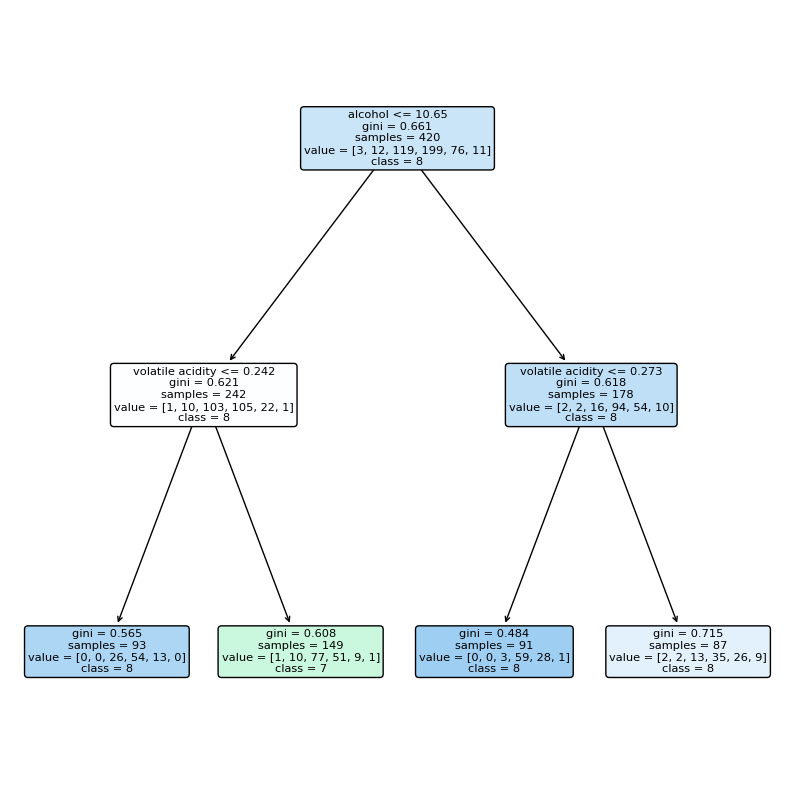

In [199]:
print("In best clf model the key parameters are ccp_alpha is ", best_alpha)
print("max depth is ", best_depth)
print("max feature is ", best_features)
print("max nodes is ", best_node)
print("train acr with best clf ", best_clf.score(X_train, Y_train))
print("test acr with best clf ", best_clf.score(X_test, Y_test))
print("Berfore modify the model's key parameters, the train accuracy was ",first_model_train_acc)
print("Berfore modify the model's key parameters, the test accuracy was ",first_model_test_acc)

fig = plt.figure(figsize = (10,10))
fig = plot_tree(best_clf, feature_names=input.columns.values,class_names=list(map(str,target.unique())),
              rounded=True,
              filled=True)

## Task 2.3

In [200]:
best_accuracy = 0
train_accuracy = 0
best_ratio = 0.2

for train_ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    max_accuracy = 0

    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(input, target, train_size=train_ratio, random_state=0)
        clf = DecisionTreeClassifier(max_depth=best_depth,max_leaf_nodes = best_node,ccp_alpha=best_alpha, max_features=best_features)
        clf.fit(X_train, Y_train)
        accuracy = clf.score(X_test, Y_test)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            train_accuracy = clf.score(X_train, Y_train)

    print(f"Best Test Accuracy with {train_ratio * 100:.0f}:{(1-train_ratio) * 100:.0f} training: {max_accuracy:.4f}")
    print(f"Best Train Accuracy with {train_ratio * 100:.0f}:{(1-train_ratio) * 100:.0f} training: {train_accuracy:.4f}")

    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_ratio = train_ratio

print("\n")
print(f"Best model train and test ratio is {best_ratio * 100:.0f}:{(1-best_ratio) * 100:.0f}")
print(f"Test Accuracy: {best_accuracy:.4f} ")
print(f"Train Accuracy: {train_accuracy:.4f} ")


Best Test Accuracy with 20:80 training: 0.4979
Best Train Accuracy with 20:80 training: 0.5667
Best Test Accuracy with 30:70 training: 0.4905
Best Train Accuracy with 30:70 training: 0.5444
Best Test Accuracy with 40:60 training: 0.5028
Best Train Accuracy with 40:60 training: 0.5083
Best Test Accuracy with 50:50 training: 0.5167
Best Train Accuracy with 50:50 training: 0.4967
Best Test Accuracy with 60:40 training: 0.5875
Best Train Accuracy with 60:40 training: 0.5306
Best Test Accuracy with 70:30 training: 0.5778
Best Train Accuracy with 70:30 training: 0.4929
Best Test Accuracy with 80:20 training: 0.6000
Best Train Accuracy with 80:20 training: 0.5104


Best model train and test ratio is 80:20
Test Accuracy: 0.6000 
Train Accuracy: 0.5104 


# Task 3: Clustering

## Task 3.1

In [183]:
# Task3.1
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
Copy_Data = pd.read_csv("A2RandomSample.csv")
Copy_Data_class = Copy_Data.iloc[:, 11]
Copy_Data_x = Copy_Data.iloc[:, 0:10]
scaler = StandardScaler()
Copy_Data_x_scaled = scaler.fit_transform(Copy_Data_x)
Copy_Data_kmc = KMeans(n_clusters = 10,init='k-means++',n_init = 20, random_state=14).fit(Copy_Data_x_scaled)
print(Copy_Data_x_scaled)

[[-1.07178496  0.17299411  0.8671972  ...  0.16297327  2.17186705
   0.27497649]
 [-0.57568392 -0.44563091 -0.90217133 ... -0.23731032  1.54118937
   0.55071893]
 [-1.93996179  1.15248374 -2.10855897 ... -0.72461209  2.17186705
  -1.28756401]
 ...
 [-1.56788601 -0.23942257 -2.67153987 ... -0.3243285   1.75141526
  -0.27650839]
 [-0.20360814  0.17299411  3.27997248 ...  0.14556964  0.13968343
  -0.27650839]
 [-0.07958288  0.37920245  0.30421631 ... -1.35114293 -0.35084366
   0.36689064]]


## Task 3.2

When distortion is Distortion >= 3000, the number of cluster : 9


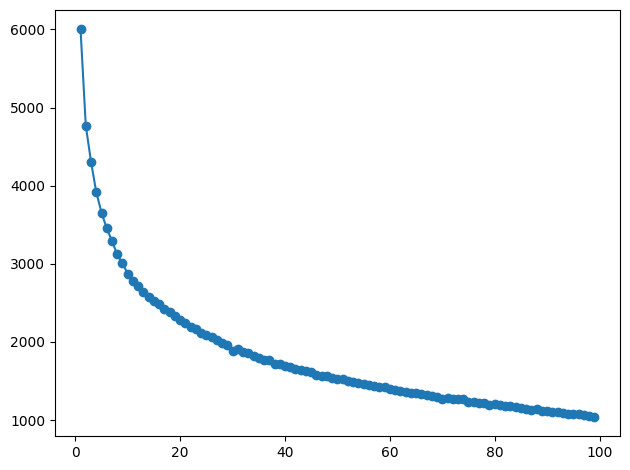

In [184]:
# Task3.2
distortions = []
target_distortion = 3000
selected_clusters = None
for i in range(1,100):
    model = KMeans(n_clusters = i,init='k-means++',n_init = 20, random_state=43)
    fit = model.fit(Copy_Data_x_scaled)
    distortions.append(model.inertia_)
    distortion = model.inertia_

    if target_distortion <= distortion:
        selected_clusters = i

plt.plot(range(1,100),distortions, marker='o')
plt.tight_layout()
plt.show

print(f"When distortion is Distortion >= 3000, the number of cluster : {selected_clusters}")


## Task 3.3

In [185]:
#Task 3.3
Copy_Data_class = Copy_Data.iloc[:, 11]
Copy_Data_x = Copy_Data.iloc[:, 0:10]
scaler = StandardScaler()
Copy_Data_x_scaled = scaler.fit_transform(Copy_Data_x)
Copy_Data_kmc = KMeans(n_clusters = selected_clusters,init='k-means++',n_init = 20, random_state=43)
fit = Copy_Data_kmc.fit(Copy_Data_x_scaled)
Copy_Data["cluster"] = fit.predict(Copy_Data_x_scaled)
Copy_Data["target"] = Copy_Data.quality
Copy_Data["c"] = "count"
clustering_result = Copy_Data[["cluster", "target", "c"]].groupby(["cluster","target"]).agg("count")
print(clustering_result)

                 c
cluster target    
0       3        1
        4        4
        5       13
        6       12
        7        2
        8        1
1       4        1
        5        7
        6       41
        7       21
        8        3
2       5        7
        6        3
        7        2
3       5       37
        6       59
        7       14
        8        1
4       5       11
        6       42
        7       22
        8        4
5       3        1
        4        2
        5       30
        6       25
        7        2
6       4        3
        5       17
        6       38
        7       27
        8        3
7       3        1
        4        2
        5       31
        6       26
        7        1
        8        1
8       4        6
        5       15
        6       46
        7       13
        8        2


In [186]:
cluster_means = Copy_Data.groupby('cluster')['quality'].mean()

print(cluster_means)

cluster
0    5.393939
1    6.246575
2    5.583333
3    5.810811
4    6.240506
5    5.416667
6    6.113636
7    5.435484
8    5.878049
Name: quality, dtype: float64


In [187]:
real_class = Copy_Data.quality
kmc_cluster = Copy_Data_kmc.labels_
table = pd.crosstab(real_class, kmc_cluster)
print(table)

col_0     0   1  2   3   4   5   6   7   8
quality                                   
3         1   0  0   0   0   1   0   1   0
4         4   1  0   0   0   2   3   2   6
5        13   7  7  37  11  30  17  31  15
6        12  41  3  59  42  25  38  26  46
7         2  21  2  14  22   2  27   1  13
8         1   3  0   1   4   0   3   1   2
